In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [139]:
data = pd.read_csv("heart failure.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [140]:
data.shape

(918, 12)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [142]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [143]:
data = data.drop(data[data["Cholesterol"]==0].index)
data = data.drop(data[data["RestingBP"]==0].index)
data = data.drop(data[data["FastingBS"]==0].index)
data.shape

(125, 12)

In [144]:
data["ChestPainType"].value_counts()

ASY    69
NAP    29
ATA    17
TA     10
Name: ChestPainType, dtype: int64

In [145]:
data["RestingECG"].value_counts()

Normal    52
LVH       38
ST        35
Name: RestingECG, dtype: int64

In [146]:
data["ExerciseAngina"].value_counts()

Y    63
N    62
Name: ExerciseAngina, dtype: int64

In [147]:
data["ST_Slope"].value_counts()

Flat    74
Up      38
Down    13
Name: ST_Slope, dtype: int64

In [148]:
data["HeartDisease"].value_counts()

1    82
0    43
Name: HeartDisease, dtype: int64

In [149]:
obj = data.dtypes == "object"
objects = list(obj[obj].index)
print(objects)
le = LabelEncoder()

for i in objects:
    data[i] = le.fit_transform(data[i])

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


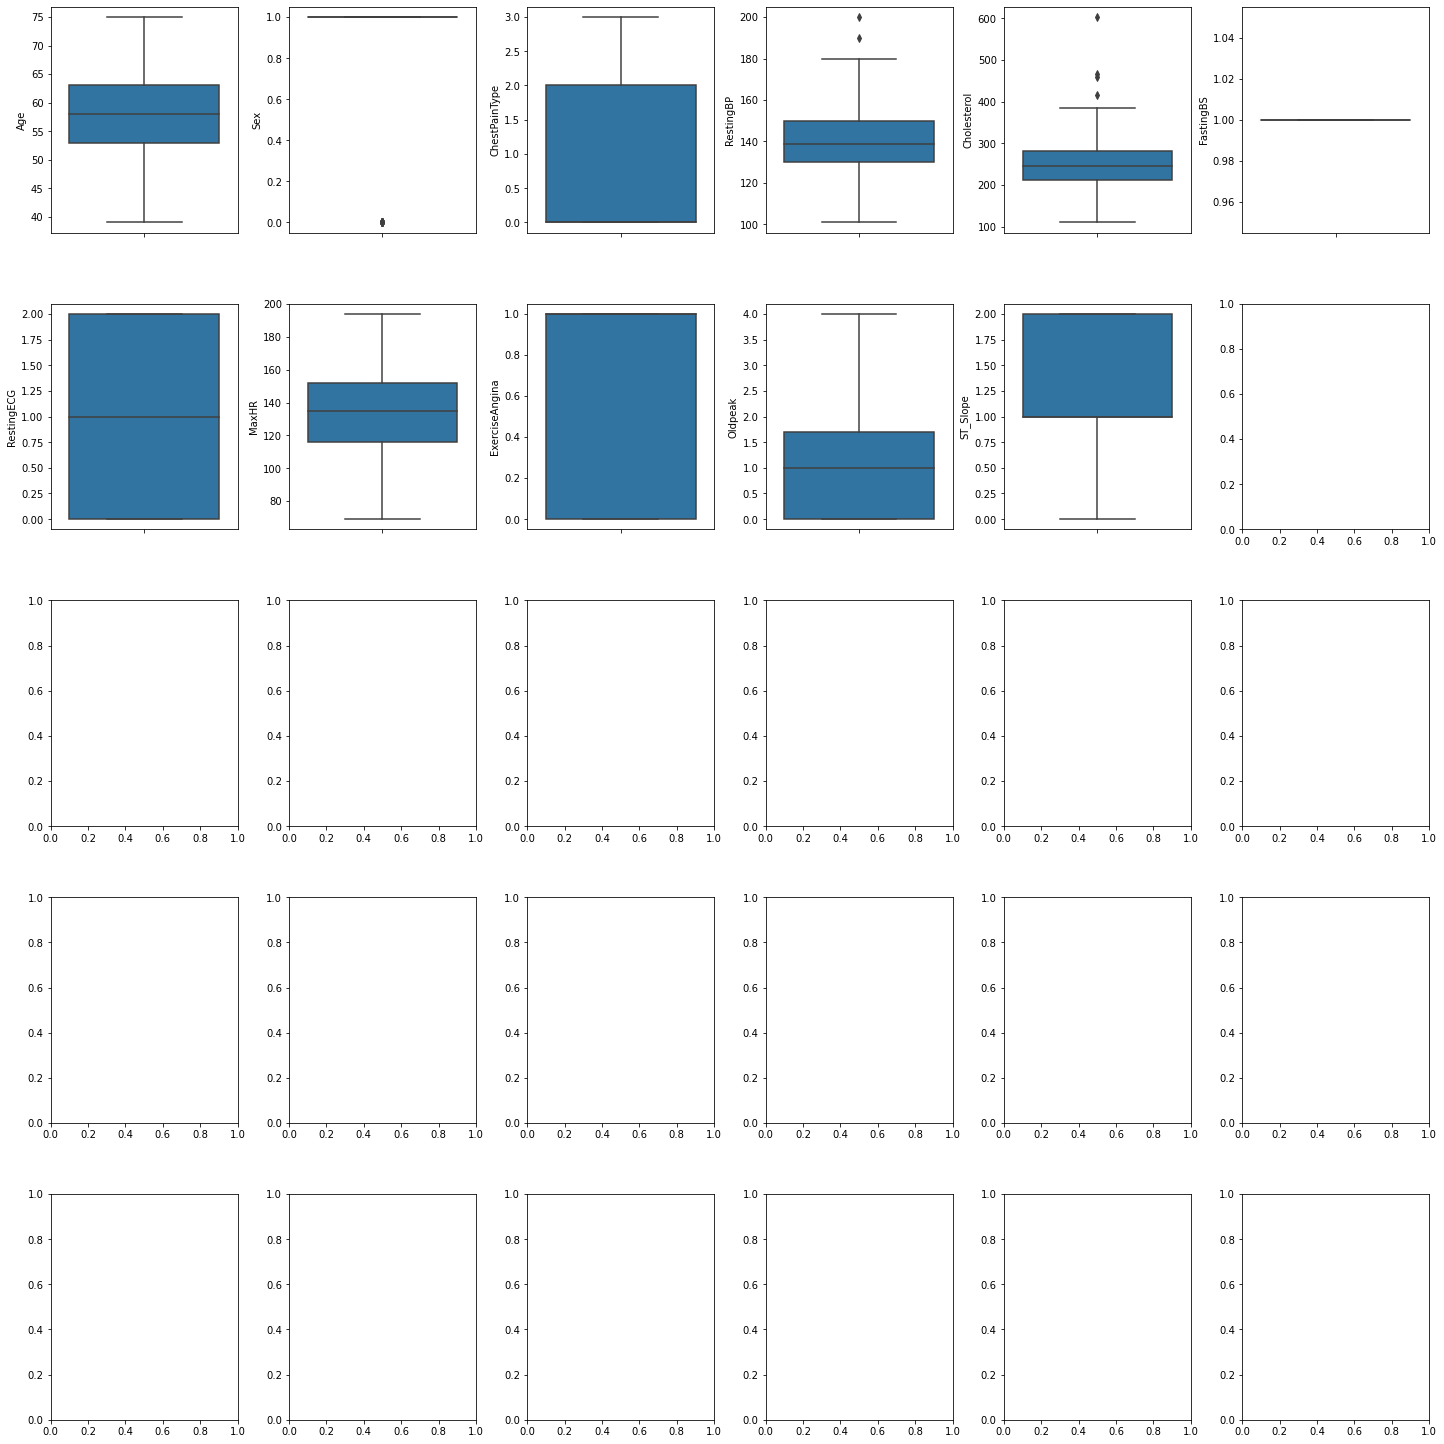

In [150]:
data1 = data.drop(columns=['HeartDisease'], axis=1)

fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [151]:
# Removing Outliers

data["RestingBP"] = data[(data["RestingBP"] < data["RestingBP"].mean() + 3 * data["RestingBP"].std()) & (data["RestingBP"] > data["RestingBP"].mean() - 3 * data["RestingBP"].std())] 
data["Cholesterol"] = data[(data["Cholesterol"] < data["Cholesterol"].mean() + 3 * data["Cholesterol"].std()) & (data["Cholesterol"] > data["Cholesterol"].mean() - 3 * data["Cholesterol"].std())] 

In [152]:
data.dropna(inplace=True)

In [153]:
data.shape

(121, 12)

In [154]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
36,65,1,0,65.0,65.0,1,1,87,1,1.5,1,1
38,48,0,1,48.0,48.0,1,2,148,0,0.0,2,0
52,45,1,1,45.0,45.0,1,1,122,0,0.0,2,0
84,56,1,0,56.0,56.0,1,1,125,1,1.0,1,1
86,65,1,0,65.0,65.0,1,1,112,1,2.0,1,1


In [155]:
x = data.drop(columns="HeartDisease")
y = data["HeartDisease"]

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [187]:
lor = LogisticRegression()

In [188]:
dt = DecisionTreeClassifier(max_depth=10)

In [189]:
rf = RandomForestClassifier(n_estimators=500)

In [190]:
estimators = [("lor",lor), ("dt",dt), ("rf",rf)]
vc = VotingClassifier(estimators = estimators)

In [191]:
models = [("lor",lor), ("dt",dt), ("vc",vc), ("rf",rf)]

for i in models:
    var = i[1]
    var.fit(x_train,y_train)
    pred = var.predict(x_test)
    print("accuracy_score ",i[0],": ",accuracy_score(y_test,pred)*100)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy_score  lor :  80.0
accuracy_score  dt :  96.0
accuracy_score  vc :  92.0
accuracy_score  rf :  92.0
